In [4]:
from ipynb.fs.full.whole_df import get_uppers, get_downers, get_whole_df, get_average_person_number, get_all_distances
import os
import numpy as np
import itertools
import pandas as pd
import statistics
import math
import seaborn as sb
import matplotlib.pyplot as plt
import matplotlib as mlp

In [5]:
index_df = list(range(100))
full_df = pd.DataFrame(index = index_df)
for filename in os.listdir(r"C:\Users\robin\Documents\Bachelorarbeit\Wartetrauben Analyse und Auswertung\Whole Dfs"):
    if "geo" not in filename:
#         df = get_whole_df(filename, 5, 5)
        df = pd.read_csv("Whole Dfs/" + filename, index_col=0)
        df = df.sort_values(["frame_x", "GroupID", "id"])
        last_df = df.groupby("id").last()
        last_df = last_df.sort_values("frame_x")
        delta_t = []
        for gruppe in last_df["GroupID"].unique():
            gruppe_df = last_df.loc[last_df["GroupID"] == gruppe]
            for i in gruppe_df["frame_x"].diff():
                if not np.isnan(i):
                    delta_t.append(i)
        full_df[filename] = pd.Series(delta_t).value_counts(1).sort_index()

In [6]:
full_df

,ZHDB_0205_6_20.txt_5erTraubenDf.csv,ZHDB_0212_6_20.txt_5erTraubenDf.csv,ZHDB_0219_6_20.txt_5erTraubenDf.csv,ZHDB_0226_6_20.txt_5erTraubenDf.csv,ZHDB_0304_6_20.txt_5erTraubenDf.csv,ZHDB_0311_6_20.txt_5erTraubenDf.csv,ZHDB_0318_6_20.txt_5erTraubenDf.csv,ZHDB_0325_6_20.txt_5erTraubenDf.csv,ZHDB_0401_6_20.txt_5erTraubenDf.csv,ZHDB_0408_6_20.txt_5erTraubenDf.csv,...,ZHDB_0624_6_20.txt_5erTraubenDf.csv,ZHDB_0701_6_20.txt_5erTraubenDf.csv,ZHDB_0708_6_20.txt_5erTraubenDf.csv,ZHDB_0715_6_20.txt_5erTraubenDf.csv,ZHDB_0722_6_20.txt_5erTraubenDf.csv,ZHDB_0729_6_20.txt_5erTraubenDf.csv,ZHDB_0805_6_20.txt_5erTraubenDf.csv,ZHDB_0812_6_20.txt_5erTraubenDf.csv,ZHDB_0819_6_20.txt_5erTraubenDf.csv,ZHDB_0826_6_20.txt_5erTraubenDf.csv
0,0.148936,0.108333,0.115385,0.144366,0.143564,0.1050,0.081897,0.083333,0.083333,0.088889,...,0.132114,0.118534,0.128440,0.123832,0.134615,0.111905,0.125000,0.136752,0.122845,0.132479
1,0.335106,0.380556,0.401099,0.429577,0.366337,0.3775,0.405172,0.322917,0.354167,0.355556,...,0.351626,0.312500,0.291284,0.341121,0.355769,0.338095,0.361607,0.341880,0.355603,0.363248
2,0.295213,0.308333,0.293956,0.274648,0.316832,0.3575,0.284483,0.375000,0.375000,0.322222,...,0.290650,0.303879,0.325688,0.334112,0.283654,0.311905,0.308036,0.322650,0.265086,0.309829
3,0.098404,0.097222,0.098901,0.063380,0.101485,0.0875,0.133621,0.145833,0.125000,0.150000,...,0.117886,0.137931,0.128440,0.095794,0.132212,0.135714,0.107143,0.104701,0.142241,0.098291
4,0.050532,0.047222,0.032967,0.024648,0.027228,0.0350,0.043103,0.052083,0.052083,0.061111,...,0.065041,0.079741,0.073394,0.070093,0.048077,0.057143,0.055804,0.057692,0.053879,0.047009
5,0.018617,0.019444,0.008242,0.007042,0.012376,0.0075,0.021552,0.010417,NaN,0.016667,...,0.016260,0.019397,0.016055,0.004673,0.012019,0.016667,0.013393,0.006410,0.025862,0.014957
6,0.013298,0.016667,0.021978,0.028169,0.004950,0.0100,0.021552,NaN,NaN,0.005556,...,0.010163,0.017241,0.006881,0.009346,0.014423,0.009524,0.004464,0.008547,0.015086,0.008547
7,0.007979,0.002778,NaN,0.007042,0.007426,0.0025,0.004310,NaN,0.010417,NaN,...,0.004065,0.006466,0.018349,0.011682,0.007212,0.007143,0.008929,0.006410,0.006466,0.010684
8,0.010638,0.005556,0.005495,0.007042,0.002475,0.0050,NaN,NaN,NaN,NaN,...,0.004065,0.002155,0.002294,0.002336,NaN,0.002381,0.002232,0.002137,NaN,0.002137
9,0.005319,0.005556,0.002747,NaN,NaN,0.0050,NaN,NaN,NaN,NaN,...,0.002033,NaN,0.004587,0.002336,0.004808,0.004762,0.002232,0.002137,0.002155,NaN


In [11]:
col = [i.replace("_5erTraubenDf.csv", "") for i in full_df.columns]
full_df.columns = col

In [12]:
full_df = full_df.dropna(axis = 0, how = 'all')

In [13]:
select_columns = full_df[["ZHDB_0212_6_20.txt", "ZHDB_0401_6_20.txt", "ZHDB_0513_6_20.txt", "ZHDB_0708_6_20.txt"]]
select_columns

,ZHDB_0212_6_20.txt,ZHDB_0401_6_20.txt,ZHDB_0513_6_20.txt,ZHDB_0708_6_20.txt
0,0.108333,0.083333,0.100694,0.128440
1,0.380556,0.354167,0.315972,0.291284
2,0.308333,0.375000,0.347222,0.325688
3,0.097222,0.125000,0.152778,0.128440
4,0.047222,0.052083,0.052083,0.073394
5,0.019444,NaN,0.024306,0.016055
6,0.016667,NaN,NaN,0.006881
7,0.002778,0.010417,0.003472,0.018349
8,0.005556,NaN,NaN,0.002294
9,0.005556,NaN,0.003472,0.004587


In [14]:
select_columns.index = select_columns.index.astype(str)
select_columns = select_columns.fillna(0)
select_columns.columns = ["12.02.2020", "01.04.2020", "13.05.2020", "07.08.2020"]
select_columns

,12.02.2020,01.04.2020,13.05.2020,07.08.2020
0,0.108333,0.083333,0.100694,0.128440
1,0.380556,0.354167,0.315972,0.291284
2,0.308333,0.375000,0.347222,0.325688
3,0.097222,0.125000,0.152778,0.128440
4,0.047222,0.052083,0.052083,0.073394
5,0.019444,0.000000,0.024306,0.016055
6,0.016667,0.000000,0.000000,0.006881
7,0.002778,0.010417,0.003472,0.018349
8,0.005556,0.000000,0.000000,0.002294
9,0.005556,0.000000,0.003472,0.004587


In [15]:
for date in select_columns.columns:
    select_columns[date] = select_columns[date] * 100
select_columns

,12.02.2020,01.04.2020,13.05.2020,07.08.2020
0,10.833333,8.333333,10.069444,12.844037
1,38.055556,35.416667,31.597222,29.128440
2,30.833333,37.500000,34.722222,32.568807
3,9.722222,12.500000,15.277778,12.844037
4,4.722222,5.208333,5.208333,7.339450
5,1.944444,0.000000,2.430556,1.605505
6,1.666667,0.000000,0.000000,0.688073
7,0.277778,1.041667,0.347222,1.834862
8,0.555556,0.000000,0.000000,0.229358
9,0.555556,0.000000,0.347222,0.458716


In [16]:
plt.rcParams["font.family"] = "Microsoft Yi Baiti"
mlp.rc('font',family="Microsoft Yi Baiti")

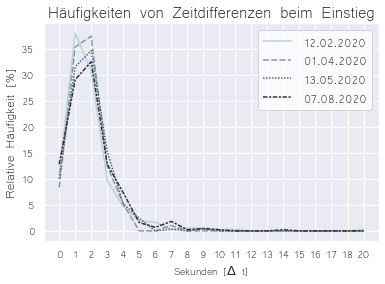

In [17]:
sb.set()
sb.lineplot(data=select_columns, sort = False, palette="bone_r")
plt.xlabel("Sekunden [$\Delta$ t]", fontsize = 13, fontname = "Microsoft Yi Baiti")
plt.xticks(fontsize = 13, fontname = "Microsoft Yi Baiti")
plt.ylabel("Relative Häufigkeit [%]", fontsize = 16, fontname = "Microsoft Yi Baiti")
plt.yticks(fontsize = 13, fontname = "Microsoft Yi Baiti")
plt.title("Häufigkeiten von Zeitdifferenzen beim Einstieg", fontsize = 20,fontname="Microsoft Yi Baiti")
plt.legend(facecolor = "white", prop={'family':"Microsoft Yi Baiti", 'size':14})
plt.savefig(r"Delta T\Delta T ausgewählte Tage", dpi = 200)